In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Exploring Data

### S&P 500 Data

In [2]:
# S&P 500 Data
SP500_df = yf.download("^GSPC", start="1986-01-01", end="2026-1-1", multi_level_index=False)

SP500_df = SP500_df.reset_index()

SP500_df.head()

[*********************100%***********************]  1 of 1 completed


,Date,Close,High,Low,Open,Volume
0,1986-01-02,209.589996,211.279999,208.929993,211.279999,98960000
1,1986-01-03,210.880005,210.880005,209.509995,209.589996,105000000
2,1986-01-06,210.649994,210.979996,209.929993,210.880005,99610000
3,1986-01-07,213.800003,213.800003,210.649994,210.649994,153000000
4,1986-01-08,207.970001,214.570007,207.490005,213.800003,180300000


In [3]:
SP500_df.describe()

,Date,Close,High,Low,Open,Volume
count,10078,10078.000000,10078.000000,10078.000000,10078.000000,1.007800e+04
mean,2005-12-22 22:47:33,1663.952956,1673.157637,1653.392509,1663.611308,2.331115e+09
min,1986-01-02 00:00:00,203.490005,204.429993,202.600006,203.490005,0.000000e+00
25%,1995-12-18 06:00:00,610.824997,613.412521,605.987503,609.710007,3.770075e+08
50%,2005-12-19 12:00:00,1229.040039,1237.465027,1221.095032,1229.035034,2.064255e+09
75%,2015-12-22 18:00:00,2085.494995,2094.320068,2077.105103,2084.389954,3.826382e+09
max,2025-12-31 00:00:00,6932.049805,6945.770020,6921.600098,6936.020020,1.145623e+10
std,NaN,1443.740087,1450.728925,1435.754560,1443.546412,1.919890e+09


In [4]:
idx = SP500_df.index[SP500_df["Volume"] == 0][0]
SP500_df[idx-1:idx+2]

,Date,Close,High,Low,Open,Volume
9423,2023-05-23,4145.580078,4185.680176,4142.540039,4176.799805,4155320000
9424,2023-05-24,4115.240234,4132.959961,4103.979980,4132.959961,0
9425,2023-05-25,4151.279785,4165.740234,4129.729980,4155.709961,4147760000


In [5]:
SP500_df.loc[idx, "Volume"] = (SP500_df.loc[idx-1, "Volume"] + SP500_df.loc[idx+1, "Volume"]) / 2
SP500_df[idx-1:idx+2]

,Date,Close,High,Low,Open,Volume
9423,2023-05-23,4145.580078,4185.680176,4142.540039,4176.799805,4155320000
9424,2023-05-24,4115.240234,4132.959961,4103.979980,4132.959961,4151540000
9425,2023-05-25,4151.279785,4165.740234,4129.729980,4155.709961,4147760000


In [6]:
SP500_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10078 entries, 0 to 10077
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype        
---  ------  --------------  -----        
 0   Date    10078 non-null  datetime64[s]
 1   Close   10078 non-null  float64      
 2   High    10078 non-null  float64      
 3   Low     10078 non-null  float64      
 4   Open    10078 non-null  float64      
 5   Volume  10078 non-null  int64        
dtypes: datetime64[s](1), float64(4), int64(1)
memory usage: 472.5 KB


In [7]:
SP500_df.isnull().sum()

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

### 5 Factors Data

In [8]:
RD5F_df = pd.read_csv("F-F_Research_Data_5_Factors_2x3_daily.CSV")

In [9]:
RD5F_df.head()

,Unnamed: 0,Mkt-RF,SMB,HML,RMW,CMA,RF
0,19630701,-0.67,0.02,-0.35,0.03,0.13,0.012
1,19630702,0.79,-0.28,0.28,-0.08,-0.21,0.012
2,19630703,0.63,-0.18,-0.10,0.13,-0.25,0.012
3,19630705,0.40,0.09,-0.28,0.07,-0.30,0.012
4,19630708,-0.63,0.07,-0.20,-0.27,0.06,0.012


In [10]:
RD5F_df = RD5F_df.rename(columns={"Unnamed: 0":"Date"})
RD5F_df["Date"] = pd.to_datetime(RD5F_df["Date"], format="%Y%m%d")

In [11]:
RD5F_df.head()

,Date,Mkt-RF,SMB,HML,RMW,CMA,RF
0,1963-07-01,-0.67,0.02,-0.35,0.03,0.13,0.012
1,1963-07-02,0.79,-0.28,0.28,-0.08,-0.21,0.012
2,1963-07-03,0.63,-0.18,-0.10,0.13,-0.25,0.012
3,1963-07-05,0.40,0.09,-0.28,0.07,-0.30,0.012
4,1963-07-08,-0.63,0.07,-0.20,-0.27,0.06,0.012


In [12]:
RD5F_df.describe()

,Date,Mkt-RF,SMB,HML,RMW,CMA,RF
count,15481,15481.000000,15481.000000,15481.000000,15481.000000,15481.000000,15481.000000
mean,1994-04-09 15:19:34.110199,0.028087,0.006319,0.013754,0.013817,0.012062,0.017282
min,1963-07-01 00:00:00,-17.440000,-11.190000,-4.970000,-3.010000,-5.870000,0.000000
25%,1978-12-12 00:00:00,-0.420000,-0.280000,-0.240000,-0.170000,-0.180000,0.007000
50%,1994-04-04 00:00:00,0.050000,0.020000,0.010000,0.010000,0.010000,0.018000
75%,2009-08-14 00:00:00,0.510000,0.310000,0.260000,0.190000,0.200000,0.024000
max,2024-12-31 00:00:00,11.350000,6.170000,6.730000,4.510000,2.530000,0.061000
std,NaN,1.019560,0.550554,0.585854,0.401676,0.380571,0.012475


In [13]:
RD5F_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 15481 entries, 0 to 15480
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    15481 non-null  datetime64[us]
 1   Mkt-RF  15481 non-null  float64       
 2   SMB     15481 non-null  float64       
 3   HML     15481 non-null  float64       
 4   RMW     15481 non-null  float64       
 5   CMA     15481 non-null  float64       
 6   RF      15481 non-null  float64       
dtypes: datetime64[us](1), float64(6)
memory usage: 846.7 KB


In [14]:
RD5F_df.isnull().sum()

Date      0
Mkt-RF    0
SMB       0
HML       0
RMW       0
CMA       0
RF        0
dtype: int64

In [15]:
RD5F_df["RF"].value_counts().sort_index()

RF
0.000    1972
0.001     652
0.002      39
0.003     209
0.004     297
0.005     250
0.006     271
0.007     382
0.008     212
0.009     165
0.010     214
0.011     230
0.012     338
0.013     349
0.014     419
0.015     481
0.016     320
0.017     481
0.018     912
0.019     609
0.020     878
0.021     750
0.022     627
0.023     452
0.024     505
0.025     343
0.026     234
0.027     189
0.028     210
0.029     171
0.030     376
0.031     167
0.032     204
0.033     214
0.034     104
0.035     107
0.036     273
0.037      64
0.038      84
0.039      41
0.040      82
0.041      43
0.042      23
0.043      64
0.044      20
0.045      19
0.047      41
0.048      19
0.049      21
0.050      21
0.051      21
0.053      79
0.054      22
0.055      22
0.056      41
0.057      41
0.059      64
0.061      43
Name: count, dtype: int64

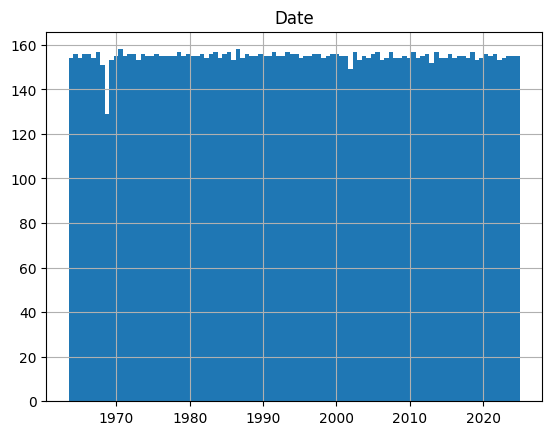

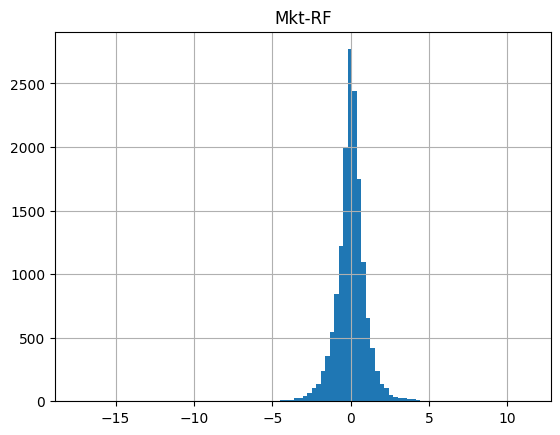

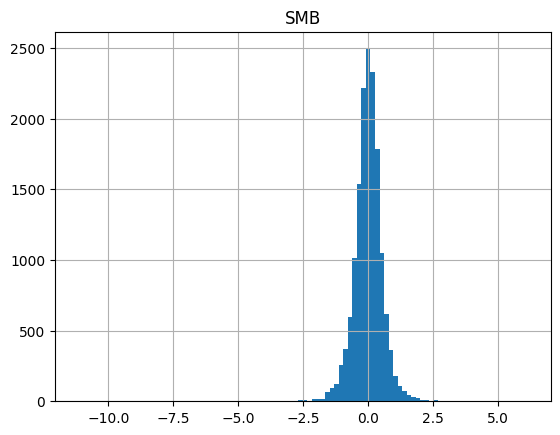

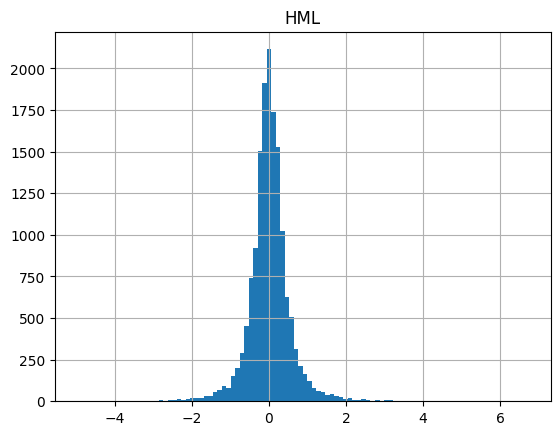

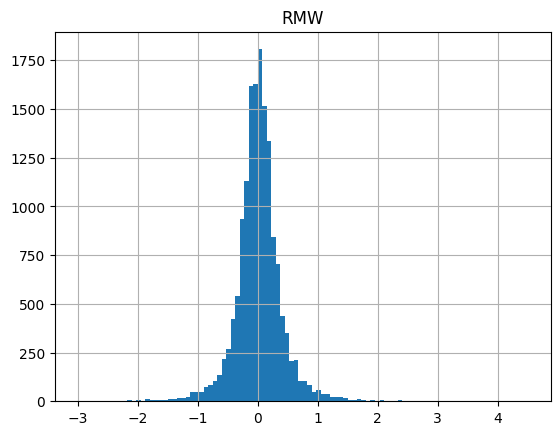

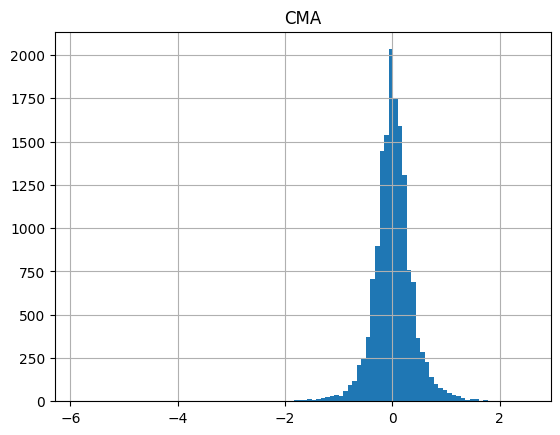

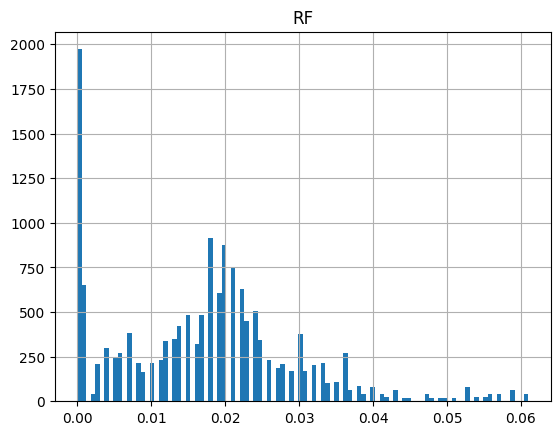

In [16]:
for col in RD5F_df.columns:
    RD5F_df[col].hist(bins=100)
    plt.title(col)
    plt.show()

In [17]:
print((RD5F_df["Date"].dt.year == 1966).sum())
print((RD5F_df["Date"].dt.year == 1967).sum())
print((RD5F_df["Date"].dt.year == 1968).sum())
print((RD5F_df["Date"].dt.year == 1969).sum())
print((RD5F_df["Date"].dt.year == 1970).sum())

252
251
226
250
254


In [18]:
RD5F_df[RD5F_df["Date"].dt.year == 1968].groupby(RD5F_df["Date"].dt.month).size()

Date
1     22
2     19
3     21
4     20
5     22
6     17
7     17
8     18
9     17
10    18
11    17
12    18
dtype: int64

### Industry Portfolios Data

In [19]:
STIP_df = pd.read_csv("17_Industry_Portfolios_Daily.csv")

C:\Users\ado18\AppData\Local\Temp\ipykernel_31524\1650734279.py:1: DtypeWarning: Columns (0: Unnamed: 0, 1: Food, 2: Mines, 3: Oil, 4: Clths, 5: Durbl, 6: Chems, 7: Cnsum, 8: Cnstr, 9: Steel, 10: FabPr, 11: Machn, 12: Cars, 13: Trans, 14: Utils, 15: Rtail, 16: Finan, 17: Other) have mixed types. Specify dtype option on import or set low_memory=False.
  STIP_df = pd.read_csv("17_Industry_Portfolios_Daily.csv")


In [20]:
STIP_df.head()

,Unnamed: 0,Food,Mines,Oil,Clths,Durbl,Chems,Cnsum,Cnstr,Steel,FabPr,Machn,Cars,Trans,Utils,Rtail,Finan,Other
0,19260701,0.03,0.30,0.62,0.14,-1.09,0.56,0.04,0.30,-0.62,-0.79,-0.12,-0.15,0.08,0.61,-0.01,0.58,-0.01
1,19260702,0.11,0.36,0.71,-0.16,-0.57,1.01,0.60,-0.03,1.18,0.96,0.38,1.09,0.05,0.47,0.01,-0.16,0.38
2,19260706,0.05,-0.19,0.17,0.37,-1.90,0.21,0.47,0.38,0.17,0.68,0.51,0.88,-0.16,0.73,-0.23,0.20,0.16
3,19260707,0.54,-0.17,-0.03,0.18,-0.06,0.83,-0.12,-0.10,-0.03,2.36,-0.12,0.04,0.12,0.17,-0.60,-0.07,0.42
4,19260708,0.94,0.34,0.09,0.75,-0.28,-0.14,0.42,0.35,-0.07,-0.50,0.48,0.01,0.46,-0.20,-0.36,-0.48,0.49


In [21]:
STIP_df = STIP_df.rename(columns={"Unnamed: 0":"Date"})
STIP_df = STIP_df[STIP_df["Date"].astype(str).str.match(r"^\d{8}$")]
STIP_df["Date"] = pd.to_datetime(STIP_df["Date"], format="%Y%m%d")

In [22]:
STIP_df.head()

,Date,Food,Mines,Oil,Clths,Durbl,Chems,Cnsum,Cnstr,Steel,FabPr,Machn,Cars,Trans,Utils,Rtail,Finan,Other
0,1926-07-01,0.03,0.30,0.62,0.14,-1.09,0.56,0.04,0.30,-0.62,-0.79,-0.12,-0.15,0.08,0.61,-0.01,0.58,-0.01
1,1926-07-02,0.11,0.36,0.71,-0.16,-0.57,1.01,0.60,-0.03,1.18,0.96,0.38,1.09,0.05,0.47,0.01,-0.16,0.38
2,1926-07-06,0.05,-0.19,0.17,0.37,-1.90,0.21,0.47,0.38,0.17,0.68,0.51,0.88,-0.16,0.73,-0.23,0.20,0.16
3,1926-07-07,0.54,-0.17,-0.03,0.18,-0.06,0.83,-0.12,-0.10,-0.03,2.36,-0.12,0.04,0.12,0.17,-0.60,-0.07,0.42
4,1926-07-08,0.94,0.34,0.09,0.75,-0.28,-0.14,0.42,0.35,-0.07,-0.50,0.48,0.01,0.46,-0.20,-0.36,-0.48,0.49


In [23]:
STIP_df.dtypes

Date     datetime64[us]
Food             object
Mines            object
Oil              object
Clths            object
Durbl            object
Chems            object
Cnsum            object
Cnstr            object
Steel            object
FabPr            object
Machn            object
Cars             object
Trans            object
Utils            object
Rtail            object
Finan            object
Other            object
dtype: object

In [24]:
for col in STIP_df.select_dtypes(include="object").columns:
    STIP_df[col] = pd.to_numeric(STIP_df[col])

In [25]:
cols = STIP_df.columns.drop("Date")
STIP_df[cols] = STIP_df[cols].apply(pd.to_numeric, errors="coerce")
STIP_df.dtypes

Date     datetime64[us]
Food            float64
Mines           float64
Oil             float64
Clths           float64
Durbl           float64
Chems           float64
Cnsum           float64
Cnstr           float64
Steel           float64
FabPr           float64
Machn           float64
Cars            float64
Trans           float64
Utils           float64
Rtail           float64
Finan           float64
Other           float64
dtype: object

In [26]:
STIP_df.describe()

,Date,Food,Mines,Oil,Clths,Durbl,Chems,Cnsum,Cnstr,Steel,FabPr,Machn,Cars,Trans,Utils,Rtail,Finan,Other
count,51802,51802.000000,51802.000000,51802.000000,51802.000000,51802.000000,51802.000000,51802.000000,51802.000000,51802.000000,51802.000000,51802.000000,51802.000000,51802.000000,51802.000000,51802.000000,51802.000000,51802.000000
mean,1974-03-05 18:56:33.320721,0.058384,0.074812,0.066359,0.059584,0.055727,0.060483,0.061112,0.062128,0.058985,0.059509,0.068493,0.063777,0.067586,0.049678,0.060581,0.064082,0.064402
min,1926-07-01 00:00:00,-16.000000,-16.080000,-27.710000,-18.380000,-19.930000,-23.010000,-18.730000,-18.830000,-23.960000,-15.610000,-20.030000,-20.570000,-17.320000,-15.260000,-17.430000,-17.230000,-17.750000
25%,1948-04-29 00:00:00,-0.330000,-0.600000,-0.550000,-0.430000,-0.510000,-0.490000,-0.390000,-0.460000,-0.610000,-0.510000,-0.500000,-0.620000,-0.500000,-0.300000,-0.390000,-0.390000,-0.380000
50%,1973-08-23 00:00:00,0.080000,0.060000,0.070000,0.080000,0.080000,0.070000,0.080000,0.080000,0.050000,0.070000,0.100000,0.060000,0.080000,0.060000,0.080000,0.080000,0.100000
75%,1999-04-08 00:00:00,0.470000,0.740000,0.680000,0.560000,0.640000,0.630000,0.530000,0.600000,0.730000,0.640000,0.660000,0.740000,0.650000,0.410000,0.530000,0.530000,0.540000
max,2024-12-31 00:00:00,24.930000,32.340000,24.690000,17.240000,20.670000,28.690000,15.390000,22.640000,38.730000,21.350000,21.240000,27.610000,19.460000,22.800000,17.850000,22.130000,20.550000
std,NaN,0.948240,1.541676,1.473344,1.174042,1.361407,1.305765,1.035657,1.277726,1.623023,1.268194,1.365001,1.561493,1.325092,1.148073,1.117165,1.233524,1.121914


In [27]:
STIP_df.isnull().sum()

Date     0
Food     0
Mines    0
Oil      0
Clths    0
Durbl    0
Chems    0
Cnsum    0
Cnstr    0
Steel    0
FabPr    0
Machn    0
Cars     0
Trans    0
Utils    0
Rtail    0
Finan    0
Other    0
dtype: int64

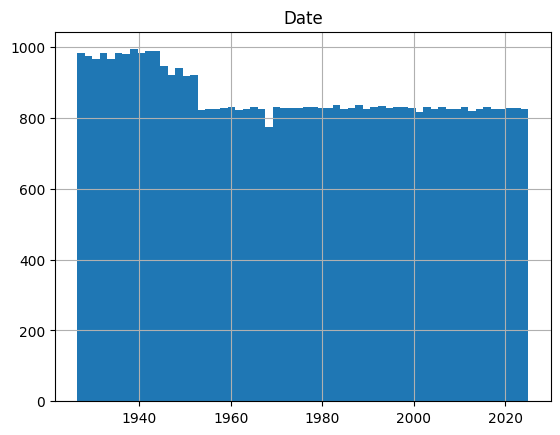

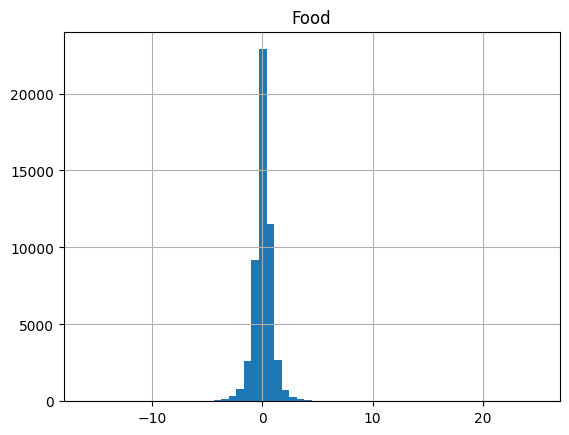

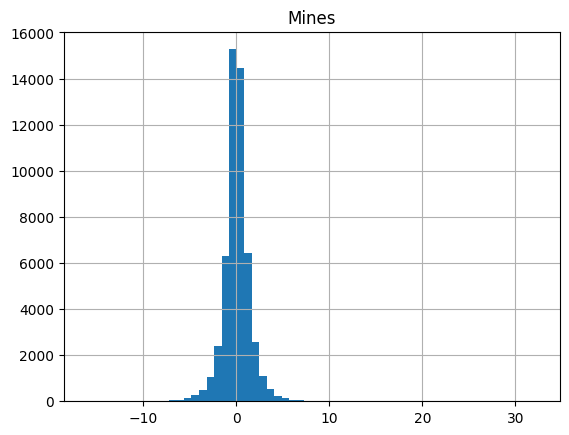

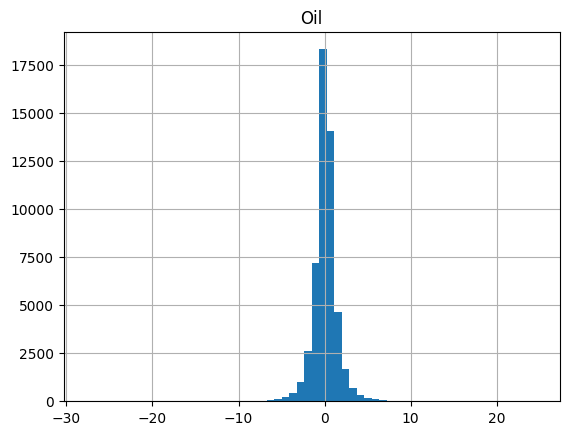

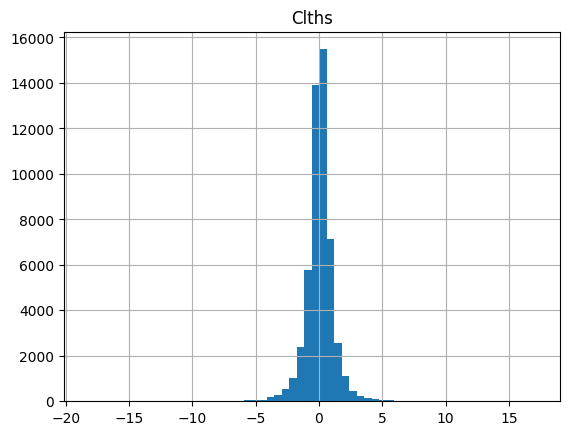

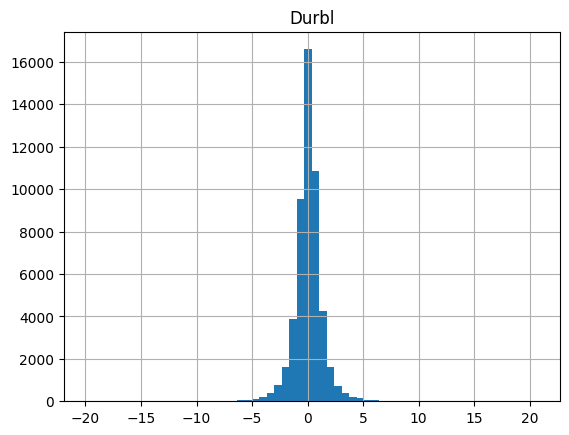

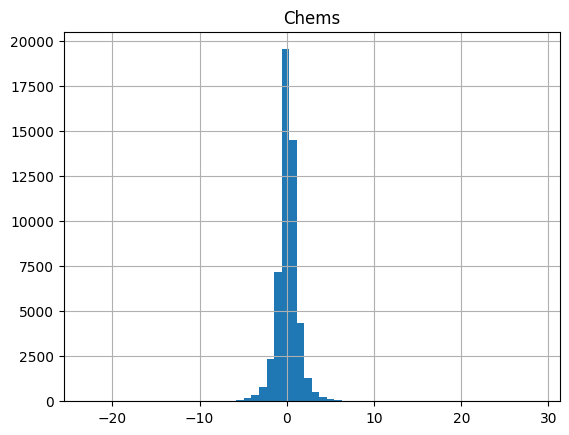

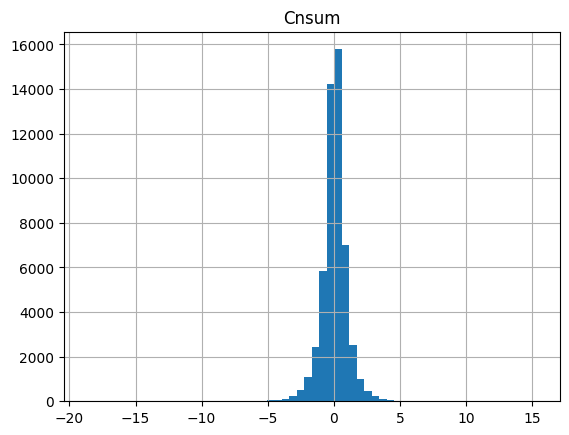

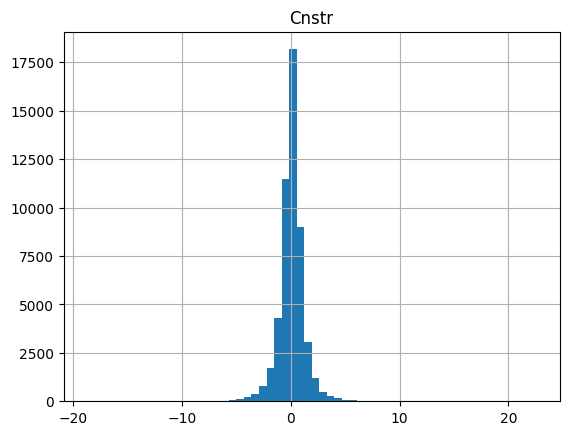

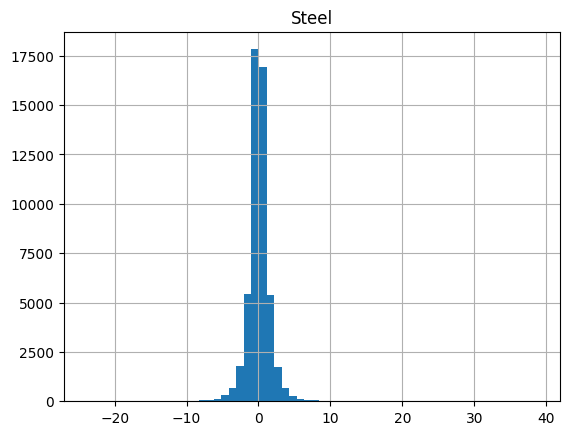

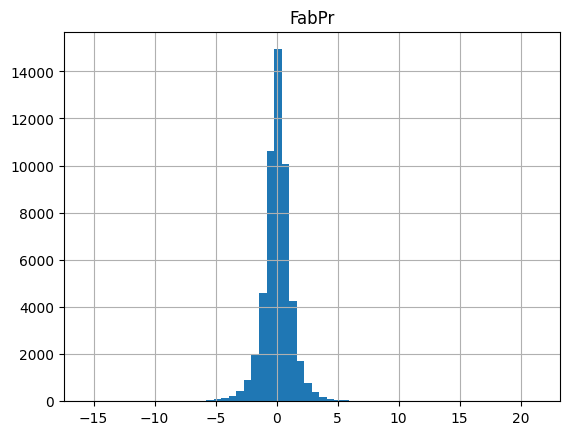

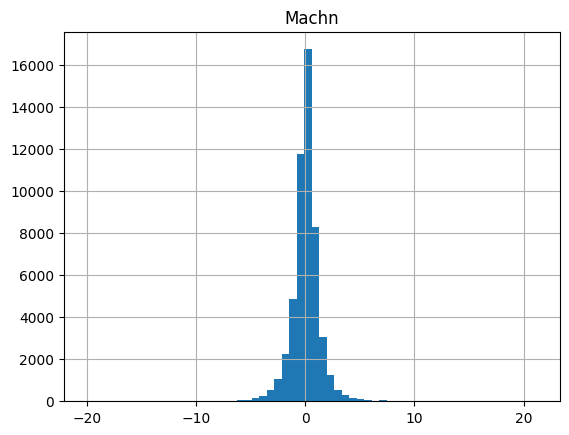

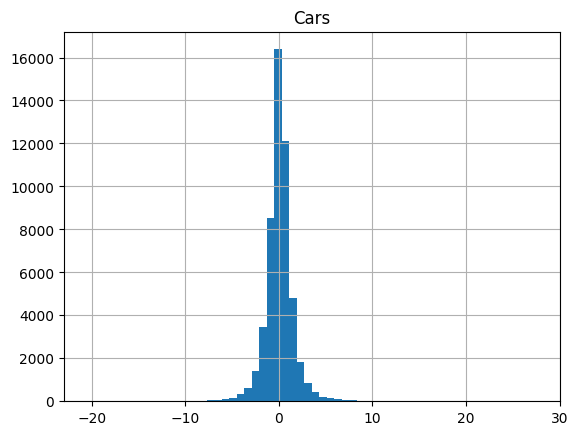

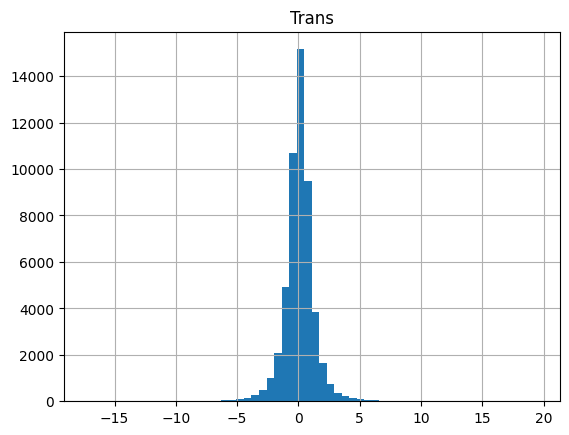

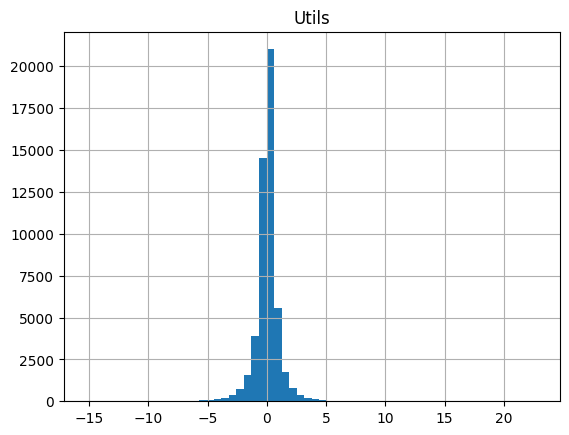

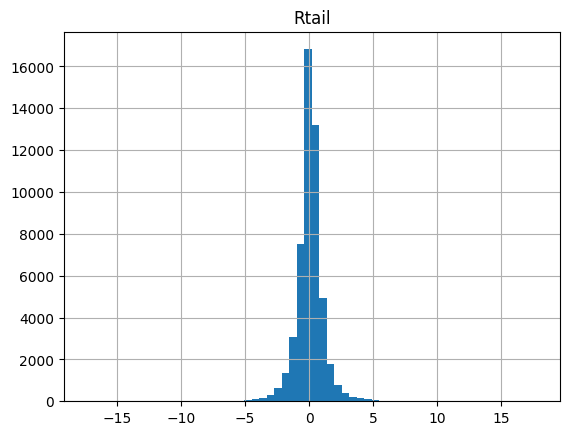

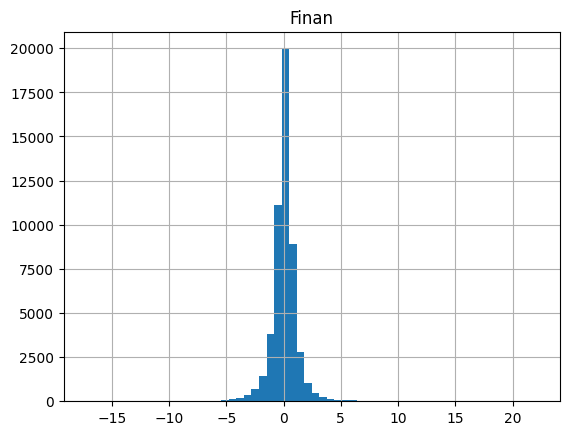

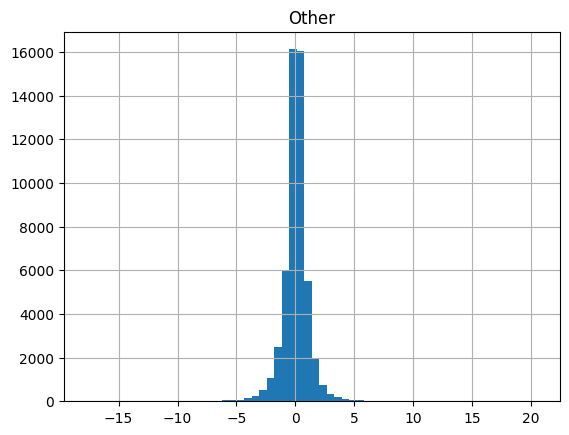

In [28]:
for col in STIP_df.columns:
    STIP_df[col].hist(bins=60)
    plt.title(col)
    plt.show()

### Momentum Factor Data

In [29]:
MF_df = pd.read_csv("F-F_Momentum_Factor_daily.CSV")

In [30]:
MF_df.head()

,Unnamed: 0,Mom
0,19261103,0.56
1,19261104,-0.50
2,19261105,1.17
3,19261106,-0.03
4,19261108,-0.01


In [31]:
MF_df.dtypes

Unnamed: 0      int64
Mom           float64
dtype: object

In [32]:
MF_df.columns

Index(['Unnamed: 0', 'Mom   '], dtype='str')

In [33]:
MF_df = MF_df.rename(columns={"Unnamed: 0":"Date", "Mom   ":"Momentum"})
MF_df["Date"] = pd.to_datetime(MF_df["Date"], format="%Y%m%d")

In [34]:
MF_df.head()

,Date,Momentum
0,1926-11-03,0.56
1,1926-11-04,-0.50
2,1926-11-05,1.17
3,1926-11-06,-0.03
4,1926-11-08,-0.01


<Axes: >

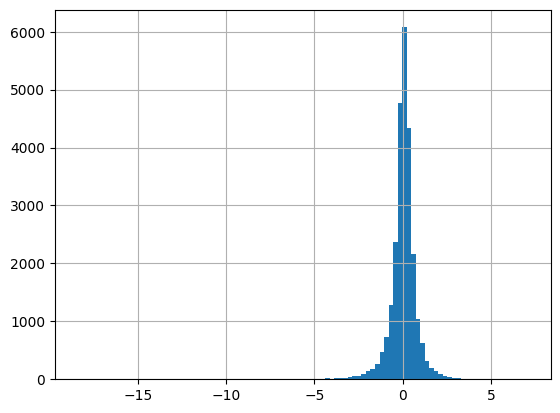

In [35]:
MF_df["Momentum"].hist(bins=100)

In [36]:
MF_df.describe()

,Date,Momentum
count,25800,25800.000000
mean,1974-05-12 17:17:58.325581,0.025186
min,1926-11-03 00:00:00,-18.440000
25%,1948-08-10 18:00:00,-0.250000
50%,1973-11-03 12:00:00,0.060000
75%,1999-05-13 06:00:00,0.360000
max,2024-12-31 00:00:00,7.120000
std,NaN,0.784482


In [37]:
MF_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 25800 entries, 0 to 25799
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      25800 non-null  datetime64[us]
 1   Momentum  25800 non-null  float64       
dtypes: datetime64[us](1), float64(1)
memory usage: 403.3 KB


### to pickle

In [38]:
SP500_df.to_pickle("SP500_df_exploration.pkl")
RD5F_df.to_pickle("RD5F_df_exploration.pkl")
STIP_df.to_pickle("STIP_df_exploration.pkl")
MF_df.to_pickle("MF_df_exploration.pkl")